In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("netflix_titles.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Data Exploration


In [4]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Cleaning

In [6]:
df["date_added"] = pd.to_datetime(df.date_added)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [8]:
df["month"] = df["date_added"].dt.month
df["year"] = df["date_added"].dt.year
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0


In [9]:
df=df.rename(columns={"listed_in":"Genre"})
df["Genre"]=df["Genre"].apply(lambda x : x.split(",")[0])
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9.0,2021.0


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
Genre              0
description        0
month             10
year              10
dtype: int64

In [11]:
df.fillna({"director":"missing","cast":"missing","country":"unavailable","date_added":"unavailable","rating":"unavailable",
           "duration":"unavailable","month":"unavailable","year":"unavailable"},inplace=True)

In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genre           0
description     0
month           0
year            0
dtype: int64

# Visualization

How many movies and shows are in the dataset?

In [13]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

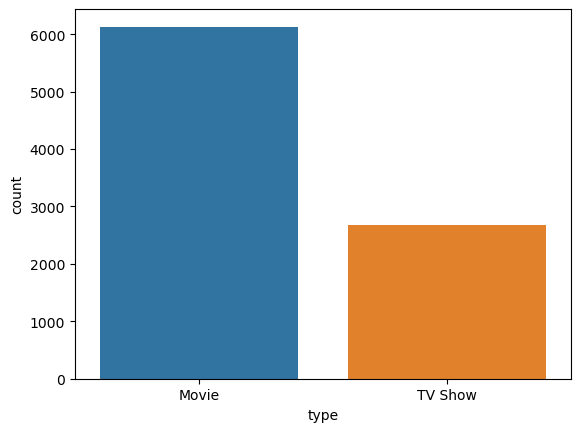

In [14]:
sns.countplot(x="type",data=df)

In which year there was highest no of Tv Shows and Movie ?

In [15]:
df.year.value_counts()

2019.0         2016
2020.0         1879
2018.0         1649
2021.0         1498
2017.0         1188
2016.0          429
2015.0           82
2014.0           24
2011.0           13
2013.0           11
unavailable      10
2012.0            3
2009.0            2
2008.0            2
2010.0            1
Name: year, dtype: int64

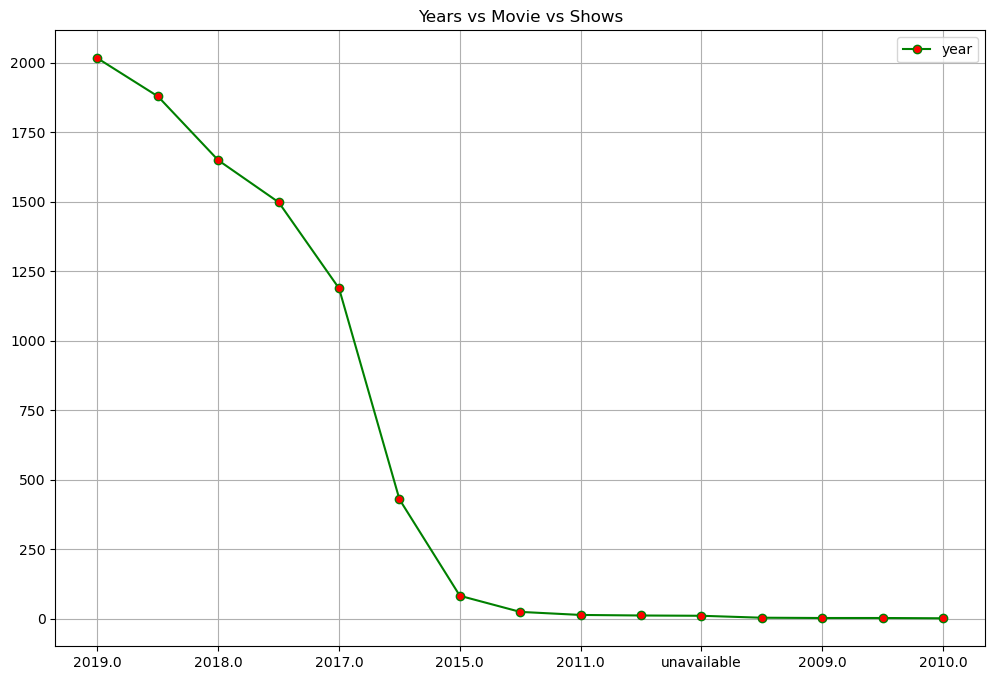

In [16]:
plt.figure(figsize=(12,8))
df["year"].value_counts().plot(kind="line",color="green",marker="o",markerfacecolor="red")
plt.title("Years vs Movie vs Shows")
plt.legend()
plt.grid()

In which month there was highest no of TV Shows & Movies?

In [17]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0


In [18]:
df["month"] = df["month"].replace({1 : "Jan",2 : "Feb",3 : "March",4:"April",5 :"May",6 :"June",7 : "July",
                        8 : "Aug",9:"Sept", 10 : "Oct",11 : "Nov",12 : "Dec"})
df[:2]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Sept,2021.0
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Sept,2021.0


In [19]:
df.month.value_counts()

July           827
Dec            813
Sept           770
April          764
Oct            760
Aug            755
March          742
Jan            738
June           728
Nov            705
May            632
Feb            563
unavailable     10
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='count'>

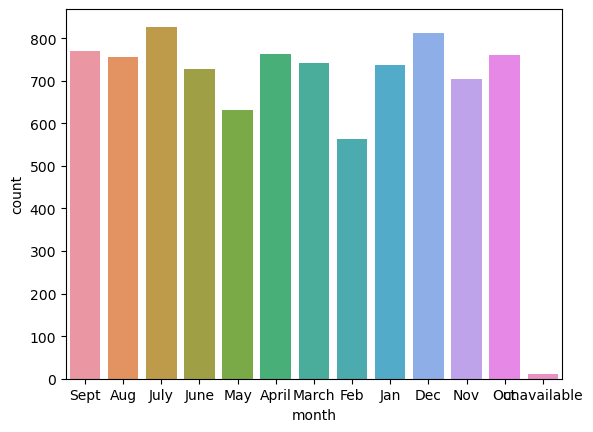

In [20]:
sns.countplot(x="month",data=df)

<Axes: >

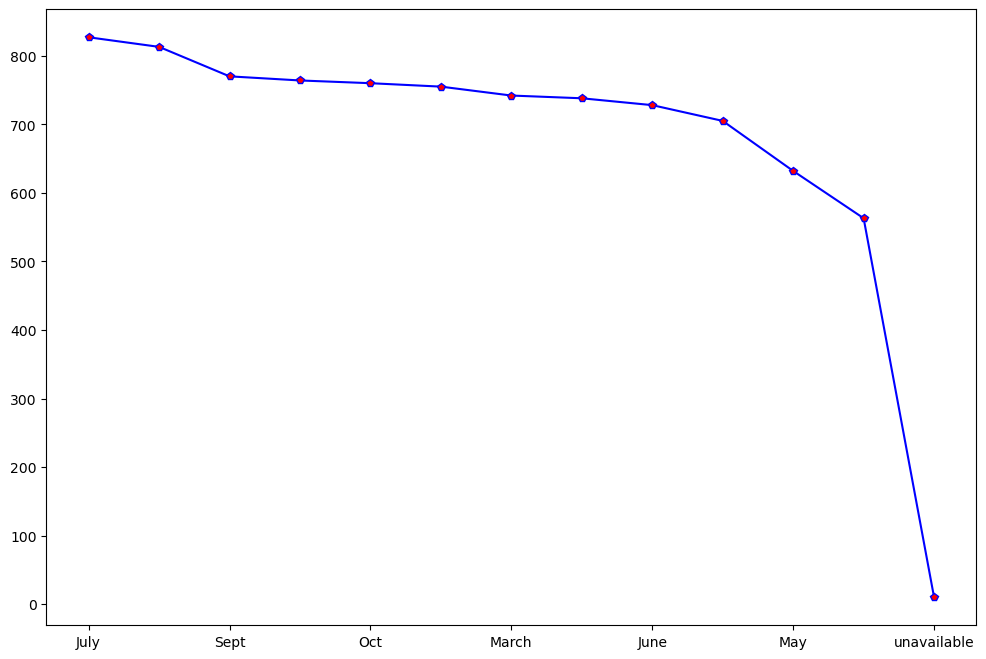

In [21]:
plt.figure(figsize=(12,8))
df["month"].value_counts().plot(kind="line",color="blue",marker="p",markerfacecolor="red")

Top 10 countries content on netflix

In [22]:
df.country.value_counts().head(10)

United States     2818
India              972
unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries Content on Netflix')

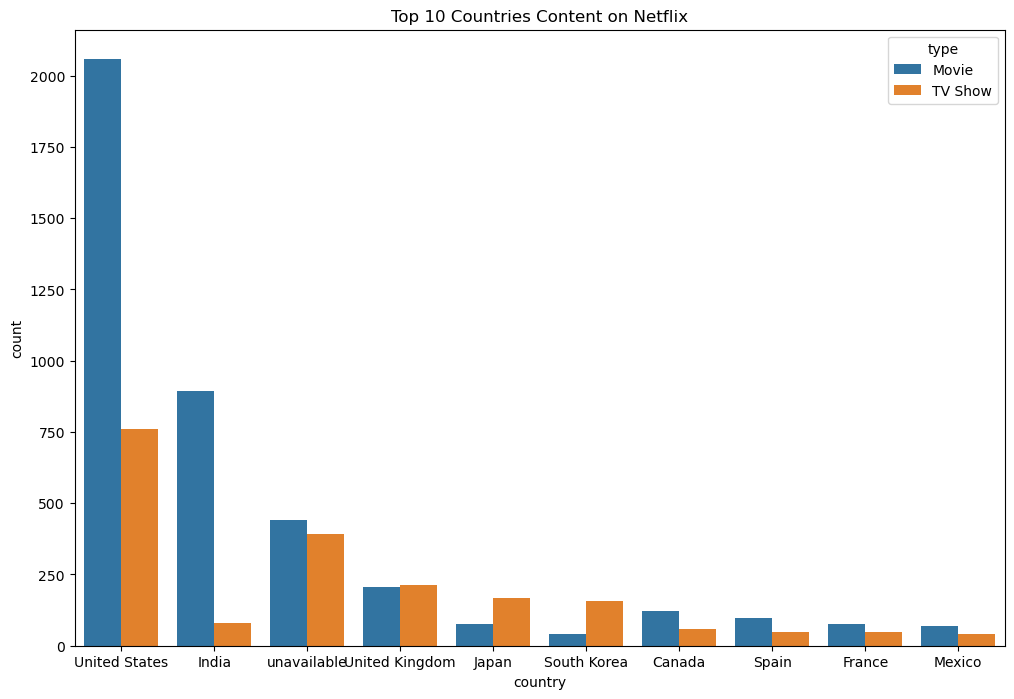

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x="country",order=df.country.value_counts().index[0:10],hue="type",data=df)
plt.title("Top 10 Countries Content on Netflix")

Which are the top 10 ratings given to the show?

In [24]:
df.rating.value_counts().head(10)

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

Text(0.5, 1.0, 'Distribution Of Rating')

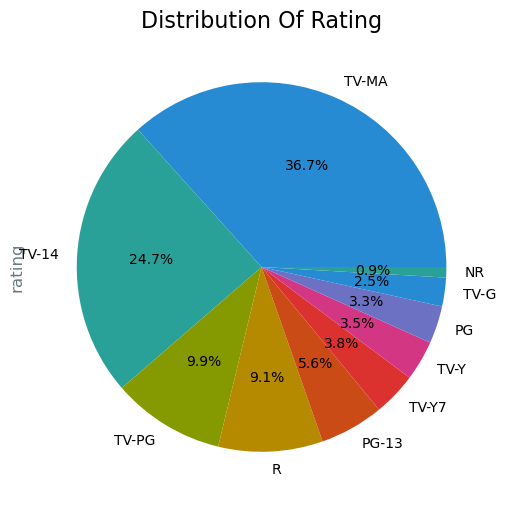

In [25]:
plt.figure(figsize = (10,6))
plt.style.use("Solarize_Light2")
df["rating"].value_counts()[:10].plot(kind ="pie",autopct= "%1.1f%%")
plt.title("Distribution Of Rating")

Find the highest watched genre on Netflix?

In [26]:
df.Genre.value_counts()

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           774
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 253
Docuseries                       221
Anime Series                     176
International Movies             128
TV Comedies                      120
Reality TV                       120
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Classic & Cult TV                 22
Anime Features                    21
Independent Movies                20
Music & Musicals                  18
T

Text(0.5, 1.0, 'Highest Watched Genre')

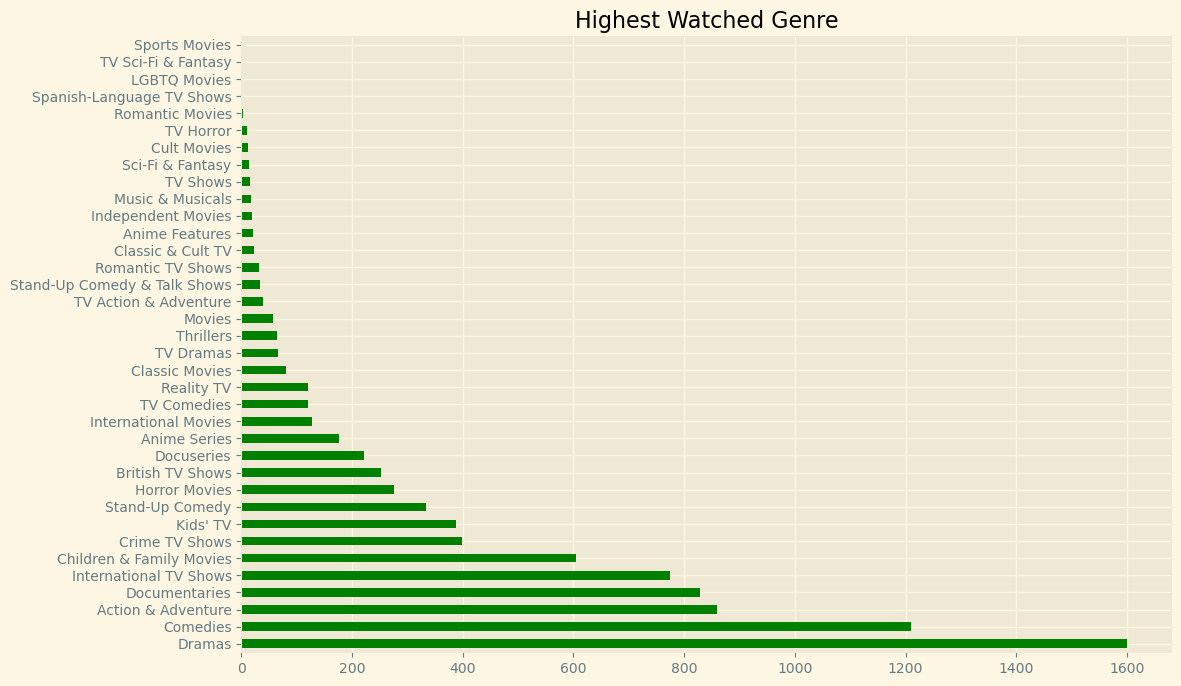

In [27]:
plt.figure(figsize=(12,8))
df["Genre"].value_counts().plot(kind="barh",color="green")
plt.title("Highest Watched Genre")

Top 10 directors which gave max no of shows

In [28]:
df.director.value_counts().head(10)

missing                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: director, dtype: int64

Text(0.5, 1.0, 'top directors')

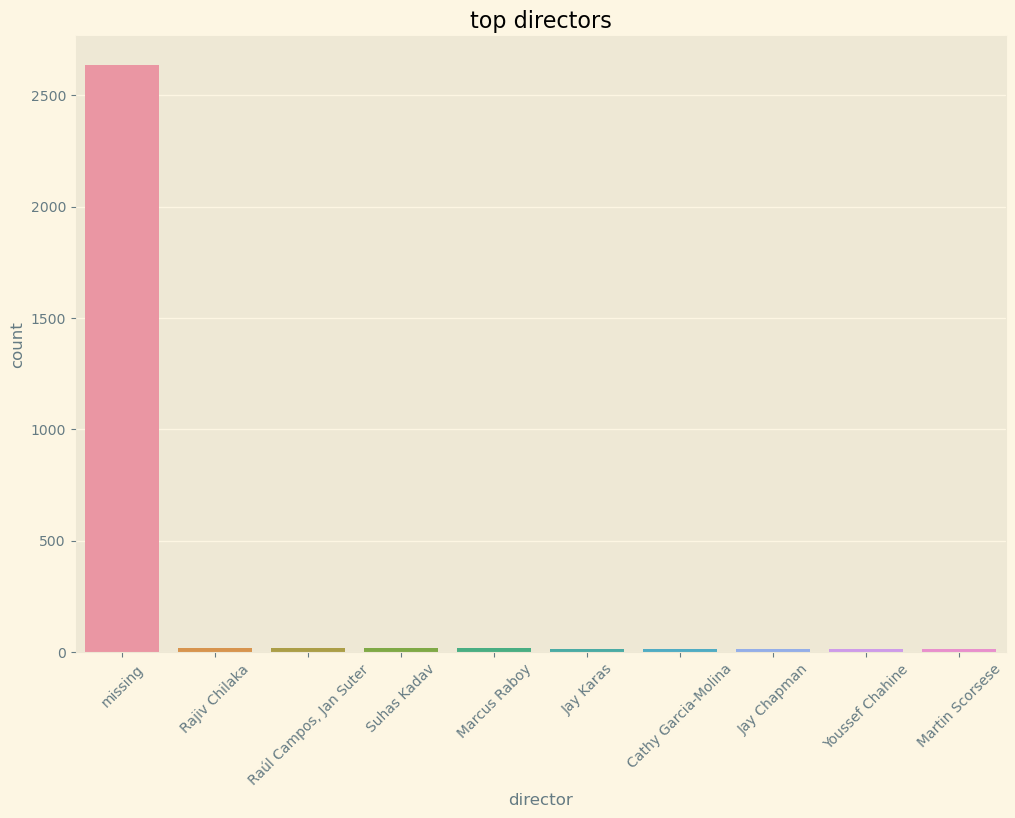

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x="director",order=df.director.value_counts().index[:10],data=df)
plt.xticks(rotation=45)
plt.title("top directors")

# SUMMARY


We had performed lot of operation on these dataset and dig out some of the most useful information. We can conclude as follows:

Netflix has more Movies than TV Shows.
Most No. Of Movies and TV Shows are produced By United States.
2019 is the year in which Netflix has produced most no of content.
Similarly July is the month in which Netflix has produced most no of content.
Rajiv Chilka is the top most director who has produced more no of movies on Netflix.
Dramas is the Genre which is most popular among the audience.